# Load in Data and Packages

I have used Algorithmic Trading – Machine Learning & Quant Strategies Course with Python by freeCodeCamp.org for this project

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import datetime as dt
import yfinance as yf 
import os 
plt.style.use('ggplot')


# 1) Converted 'date' to datetime format.
# 2) Set 'date' and 'symbol' as index for easier access.
# 3) Created 'e_ratio' as twitter engagement ratio.
# 4) Filtered DataFrame for posts with significant likes and comments.


sentiment_df = pd.read_csv(r"C:\Users\15126\Desktop\Personal Modeling Projects\sentiment_data.csv")
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df = sentiment_df.set_index(['date','symbol'])
sentiment_df['e_ratio'] = sentiment_df['twitterComments']/sentiment_df['twitterLikes']
sentiment_df = sentiment_df[(sentiment_df['twitterLikes'] > 30) & (sentiment_df['twitterComments'] > 20)]
sentiment_df



twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
           BA              61.0             55.0         342.0   
...                         ...              ...           ...   
2023-01-04 T              184.0           3409.0       14271.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment   e_ratio  
date       symbol                                                  
2021-11-18 AAPL             7981808.0               NaN  0.119590  
           AMD              1645270.0               NaN  0.228891  
           AMZN             5590695.0               NaN  0.101396  
           ATVI             1310715.0               NaN  0.274809  
           BA                425847.0               NaN  0.160819  
...                               ...               ...       ...  
2023-01-04 T                 884935.0          0.590457  0.238876  
           TSLA            55464921.0          0.543057  0.141893  
           TSN                57207.0          0.561900  0.365217  
           V                 139835.0          0.567286  0.169611  
           XOM               483389.0          0.588914  0.180589  

[24255 rows x 6 columns]

# Aggregate stocks by month and calculate average sentiment to select 5 top stocks based on their corsss-sectional ranking for each month

In [70]:
aggregated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='ME'), 'symbol'])[['e_ratio']].mean())
aggregated_df['rank'] = (aggregated_df.groupby(level = 0)['e_ratio']
                         .transform(lambda x: x.rank(ascending = False)))
filtered_df = aggregated_df[aggregated_df['rank'] < 6]
filtered_df = filtered_df.reset_index(level = 1)
filtered_df.index = filtered_df.index+pd.DateOffset(1)
filtered_df = filtered_df.reset_index().set_index(['date', 'symbol'])
filtered_df

e_ratio  rank
date       symbol                
2021-12-01 AES     0.864613   2.0
           FCX     0.626323   5.0
           MNST    0.699721   3.0
           OXY     2.147741   1.0
           SLB     0.647374   4.0
...                     ...   ...
2023-02-01 AES     0.533809   3.0
           BIIB    0.839303   1.0
           FCX     0.521080   4.0
           L       0.493916   5.0
           MDT     0.806841   2.0

[75 rows x 2 columns]

# Extract select stocks to build our portfolio from our filtering at the beginning of each month

In [72]:
dates = filtered_df.index.get_level_values('date').unique().tolist()
fixed_dates = {}
for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level='date').index.tolist()
fixed_dates

{'2021-12-01': ['AES', 'FCX', 'MNST', 'OXY', 'SLB'],
 '2022-01-01': ['A', 'FCX', 'L', 'LUV', 'MA'],
 '2022-02-01': ['AES', 'AMD', 'D', 'LUV', 'MA'],
 '2022-03-01': ['D', 'FCX', 'LUV', 'MRO', 'OXY'],
 '2022-04-01': ['A', 'CRM', 'PFE', 'PM', 'STZ'],
 '2022-05-01': ['AMD', 'CRM', 'CVX', 'J', 'KEY'],
 '2022-06-01': ['AMD', 'DD', 'FCX', 'KEY', 'LMT'],
 '2022-07-01': ['CB', 'CRM', 'DD', 'FCX', 'STZ'],
 '2022-08-01': ['A', 'DD', 'JPM', 'REGN', 'STZ'],
 '2022-09-01': ['ABT', 'DIS', 'L', 'META', 'MRNA'],
 '2022-10-01': ['AES', 'J', 'KEY', 'L', 'META'],
 '2022-11-01': ['A', 'DD', 'FCX', 'ILMN', 'META'],
 '2022-12-01': ['AES', 'DAL', 'DD', 'J', 'STZ'],
 '2023-01-01': ['A', 'AES', 'DAL', 'EBAY', 'KEY'],
 '2023-02-01': ['AES', 'BIIB', 'FCX', 'L', 'MDT']}

# Download Stock Prices for selected stocks

In [78]:
#stocks_list = sentiment_df.index.get_level_values('symbol').unique().tolist()

prices_df = yf.download(tickers=stocks_list, start='2021-12-01', end='2023-03-01')
prices_df.index = pd.to_datetime(prices_df.index).date
prices_df

                        

[*********************100%***********************]  85 of 85 completed

1 Failed download:
['ATVI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Price        Adj Close                                                 \
Ticker               A        AAL         AAP        AAPL        ABBV   
2021-12-01  145.480072  16.280001  203.108932  162.292801  104.275955   
2021-12-02  148.208847  17.420000  212.909302  161.298004  105.139610   
2021-12-03  146.579437  16.620001  211.140961  159.406860  106.920876   
2021-12-06  148.680023  17.930000  214.082001  162.834549  109.169937   
2021-12-07  150.967087  17.889999  218.670380  168.606415  109.313881   
...                ...        ...         ...         ...         ...   
2023-02-22  140.565475  15.560000  139.062637  147.747742  142.166779   
2023-02-23  141.673508  15.870000  137.503708  148.233902  143.487778   
2023-02-24  139.694839  15.560000  134.444000  145.564926  144.091660   
2023-02-27  140.664368  15.630000  136.167511  146.765442  145.573059   
2023-02-28  140.456635  15.980000  140.360107  146.259430  145.214493   

Price                                                                 ...  \
Ticker             ABT        AEP        AES         ALB         AMD  ...   
2021-12-01  120.377357  72.360725  21.556055  253.767578  149.110001  ...   
2021-12-02  121.935020  73.289116  22.013138  255.271530  150.679993  ...   
2021-12-03  123.730148  74.217514  21.720602  245.583710  144.009995  ...   
2021-12-06  125.819702  75.254066  22.269102  242.722275  139.059998  ...   
2021-12-07  125.772186  75.632645  22.689619  253.455032  144.850006  ...   
...                ...        ...        ...         ...         ...  ...   
2023-02-22   99.620415  85.452393  24.015272  242.647400   76.610001  ...   
2023-02-23   99.484596  85.348892  24.015272  249.933228   79.750000  ...   
2023-02-24   97.457077  85.085442  23.949064  245.670029   78.089996  ...   
2023-02-27   96.787689  84.746719  23.532887  253.054306   78.769997  ...   
2023-02-28   98.679405  82.770836  23.343718  250.386139   78.580002  ...   

Price        Volume                                                            \
Ticker          RCL    REGN       SLB      STZ          T      TMO       TSLA   
2021-12-01  9692100  731800  14888300   954800  106323952  1502700   68450400   
2021-12-02  7070300  563800  12517300  1247000  105952835  1481700   73114800   
2021-12-03  4668700  650400   9816300   913400   93399859  1698500   92322000   
2021-12-06  8184800  567500   8977600   867500   78265347  2319700   81663000   
2021-12-07  5259900  652500   9153800  1129000   82646331  1585300   56084700   
...             ...     ...       ...      ...        ...      ...        ...   
2023-02-22  2044600  415500   9181100  1092200   25308800  1705300  191828500   
2023-02-23  2066600  553300   6324500   979700   24845800  1160200  146360000   
2023-02-24  2875100  525900   8458700   702900   29138100   852600  142228100   
2023-02-27  2459700  557100   6287000   608200   22981100  1110600  161028300   
2023-02-28  3662300  622700  10634200  1136900   34154800  1188800  153144900   

Price                                    
Ticker          TSN         V       XOM  
2021-12-01  2427300  13204900  30630600  
2021-12-02  2993600  13976300  29216000  
2021-12-03  3070800  10660500  22014700  
2021-12-06  2744500  10722100  19210500  
2021-12-07  1874300  11897200  19800400  
...             ...       ...       ...  
2023-02-22  4217700   4621800  13973800  
2023-02-23  3403500   5533800  11289400  
2023-02-24  2439300   4414400  14351000  
2023-02-27  3922200   4255300  11710500  
2023-02-28  3556300   5385400  18107000  

[312 rows x 510 columns]

# Calculate Portfolio Returns

In [109]:
#returns_df = np.log(prices_df['Adj Close']).diff().dropna(how='all')

portfolio_df = pd.DataFrame()
returns_df.index = pd.to_datetime(returns_df.index)

for start_date in fixed_dates.keys():
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(start_date + pd.offsets.MonthEnd())
    cols = fixed_dates[start_date.strftime('%Y-%m-%d')]
    temp_df = returns_df.loc[start_date:end_date, cols].mean(axis=1).to_frame('portfolio_return')
    portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

portfolio_df




,portfolio_return
2021-12-02,0.024872
2021-12-03,-0.007711
2021-12-06,0.023926
2021-12-07,0.030547
2021-12-08,0.001167
...,...
2023-02-22,-0.006454
2023-02-23,-0.008696
2023-02-24,-0.005402
2023-02-27,-0.003844


## Download NSDAQ/QQQ Prices and Calculate Returns

In [116]:
qqq_df = yf.download(tickers='QQQ', start='2021-01-01', end='2023-03-01')
qqq_ret = np.log(qqq_df['Adj Close']).diff().to_frame('nasdaq_return')
portfolio_df = portfolio_df.merge(qqq_ret, left_index=True, right_index=True)
portfolio_df


[*********************100%***********************]  1 of 1 completed


,portfolio_return,nasdaq_return
2021-12-02,0.024872,0.007181
2021-12-03,-0.007711,-0.017542
2021-12-06,0.023926,0.007981
2021-12-07,0.030547,0.029669
2021-12-08,0.001167,0.004464
...,...,...
2023-02-22,-0.006454,0.000748
2023-02-23,-0.008696,0.008696
2023-02-24,-0.005402,-0.016886
2023-02-27,-0.003844,0.007136


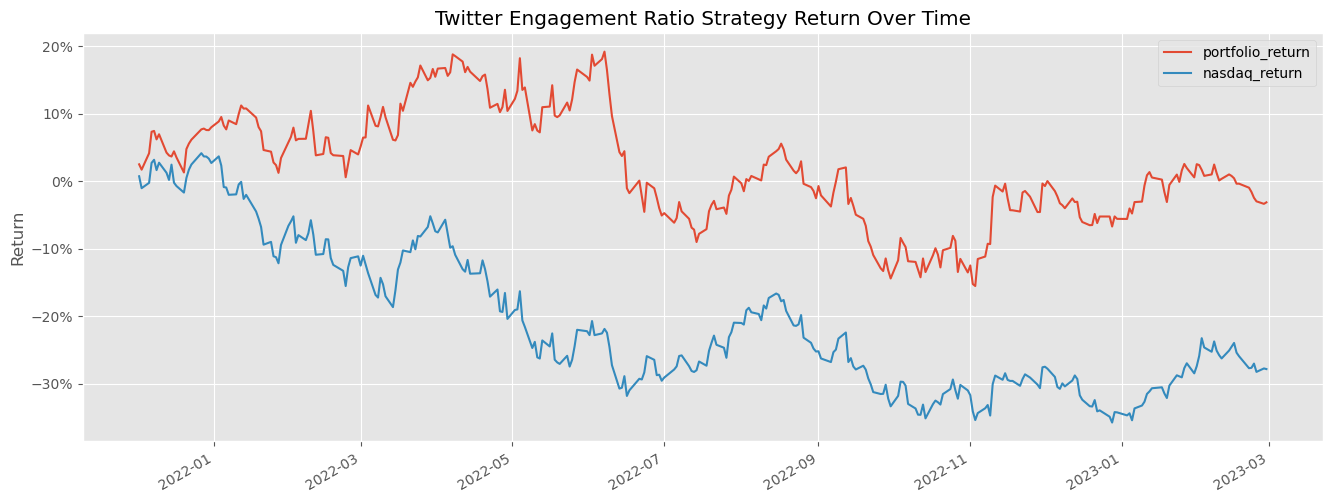

In [126]:
import matplotlib.ticker as mtick
portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)
portfolio_cumulative_return.plot(figsize=(16, 6))
plt.title('Twitter Engagement Ratio Strategy Return Over Time')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylabel('Return')
plt.show()

In [128]:
# Calculate the overall cumulative return for both strategies
portfolio_cumulative_return = np.exp(np.log1p(portfolio_df['portfolio_return']).sum()) - 1
nasdaq_cumulative_return = np.exp(np.log1p(portfolio_df['nasdaq_return']).sum()) - 1
cumulative_performance_diff = portfolio_cumulative_return - nasdaq_cumulative_return
cumulative_performance_diff


0.247041635450846

Cumulative performance difference between Sentiment Analysis portfolio strategy and the Nasdaq over the the time period. Specifically, it indicates that the portfolio outperformed the Nasdaq by approximately 24.7% during the time frame from 2021-12-01 to 2023-03-01.